In [1]:
import os
import torch
import kagglehub

from torch.utils.data import DataLoader

import torchvision.transforms as transforms

from gtsdb_dataset import GTSDBDataset

In [2]:
download_path = kagglehub.dataset_download("safabouguezzi/german-traffic-sign-detection-benchmark-gtsdb")
# actual_root_dir = os.path.join(download_path, "subdirectory_name")  # Adjust this path\

download_path

'C:\\Users\\fabia\\.cache\\kagglehub\\datasets\\safabouguezzi\\german-traffic-sign-detection-benchmark-gtsdb\\versions\\1'

In [4]:
# Define a proper named function instead of a lambda
def collate_fn(batch):
    """
    Custom collate function for object detection datasets.
    """
    images = [item[0] for item in batch]
    targets = [item[1] for item in batch]
    return images, targets

In [ ]:
# Step 2: Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Step 3: Instantiate the dataset
train_dataset = GTSDBDataset(
    root_dir=download_path
    split='train',
    transform=transform
)

# Check if everything works correctly
print(f"Dataset contains {len(train_dataset)} samples")

# Step 4: Create a DataLoader
train_loader = DataLoader(
    train_dataset,
    batch_size=4,
    shuffle=True,
    num_workers=0,
    collate_fn=collate_fnf

Dataset contains 852 samples
Loaded batch with 4 images
First image shape: torch.Size([3, 224, 224])
First target: {'boxes': tensor([[1182.,  531., 1232.,  583.]]), 'labels': tensor([7]), 'category_id': tensor([0])}


In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import torch
import torchvision.transforms as transforms

def denormalize(tensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    """
    Denormalize a tensor image with mean and standard deviation.
    
    Args:
        tensor (torch.Tensor): Normalized image tensor [C, H, W]
        mean (list): Mean used for normalization
        std (list): Standard deviation used for normalization
        
    Returns:
        torch.Tensor: Denormalized image tensor
    """
    mean = torch.tensor(mean).view(3, 1, 1)
    std = torch.tensor(std).view(3, 1, 1)
    img = tensor.clone()
    img = img * std + mean
    img = torch.clamp(img, 0, 1)
    return img

def plot_image_with_bbox(image, target, idx, class_names=None):
    """
    Plot an image with its bounding box.
    
    Args:
        image (torch.Tensor): Image tensor [C, H, W]
        target (dict): Target dictionary with 'boxes' and 'labels'
        idx (int): Index of the image in the batch
        class_names (dict, optional): Dictionary mapping class IDs to names
    """
    # Denormalize the image and convert to numpy array
    img = denormalize(image)
    img_np = img.permute(1, 2, 0).numpy()
    
    # Create figure and axes
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(img_np)
    
    # Set the title
    if class_names is None:
        title = f"Image {idx}"
    else:
        # Get class name if available
        label = target['labels'][0].item()
        class_name = class_names.get(label, f"Class {label}")
        title = f"Image {idx}: {class_name}"
    
    ax.set_title(title)
    
    # Extract boxes and labels
    boxes = target['boxes']
    
    # Draw each bounding box
    for i in range(boxes.size(0)):
        # Get box coordinates
        box = boxes[i].tolist()
        x1, y1, x2, y2 = box
        
        # Calculate width and height
        width = x2 - x1
        height = y2 - y1
        
        # Create rectangle patch
        rect = patches.Rectangle(
            (x1, y1), width, height, linewidth=2, 
            edgecolor='r', facecolor='none'
        )
        
        # Add the rectangle to the plot
        ax.add_patch(rect)
        
        # Add label if class_names is provided
        if class_names is not None:
            label = target['labels'][i].item()
            class_name = class_names.get(label, f"Class {label}")
            ax.text(
                x1, y1 - 5, 
                f"{class_name}",
                bbox=dict(facecolor='white', alpha=0.7),
                fontsize=10
            )
    
    plt.axis('off')
    return fig

# You can define a dictionary for class names
class_names = {
    0: 'Speed limit 20',
    1: 'Speed limit 30',
    2: 'Speed limit 50',
    3: 'Speed limit 60',
    4: 'Speed limit 70',
    5: 'Speed limit 80',
    7: 'End of speed limit 80',
    8: 'Speed limit 100',
    9: 'Speed limit 120',
    10: 'No passing',
    11: 'No passing for vehicles over 3.5t',
    12: 'Right-of-way at the next intersection',
    13: 'Priority road',
    14: 'Yield',
    15: 'Stop',
    16: 'No vehicles',
    17: 'No vehicles over 3.5t',
    18: 'No entry',
    19: 'General caution',
    20: 'Dangerous curve to the left',
    21: 'Dangerous curve to the right',
    22: 'Double curve',
    23: 'Bumpy road',
    24: 'Slippery road',
    25: 'Road narrows on the right',
    26: 'Road work',
    27: 'Traffic signals',
    28: 'Pedestrians',
    29: 'Children crossing',
    30: 'Bicycles crossing',
    31: 'Beware of ice/snow',
    32: 'Wild animals crossing',
    33: 'End of all speed and passing limits',
    34: 'Turn right ahead',
    35: 'Turn left ahead',
    36: 'Ahead only',
    37: 'Go straight or right',
    38: 'Go straight or left',
    39: 'Keep right',
    40: 'Keep left',
    41: 'Roundabout mandatory',
    42: 'End of no passing',
    43: 'End of no passing for vehicles over 3.5t'
}


Loaded batch with 4 images
First image shape: torch.Size([3, 224, 224])
First target: {'boxes': tensor([[425., 386., 468., 431.]]), 'labels': tensor([38]), 'category_id': tensor([1])}


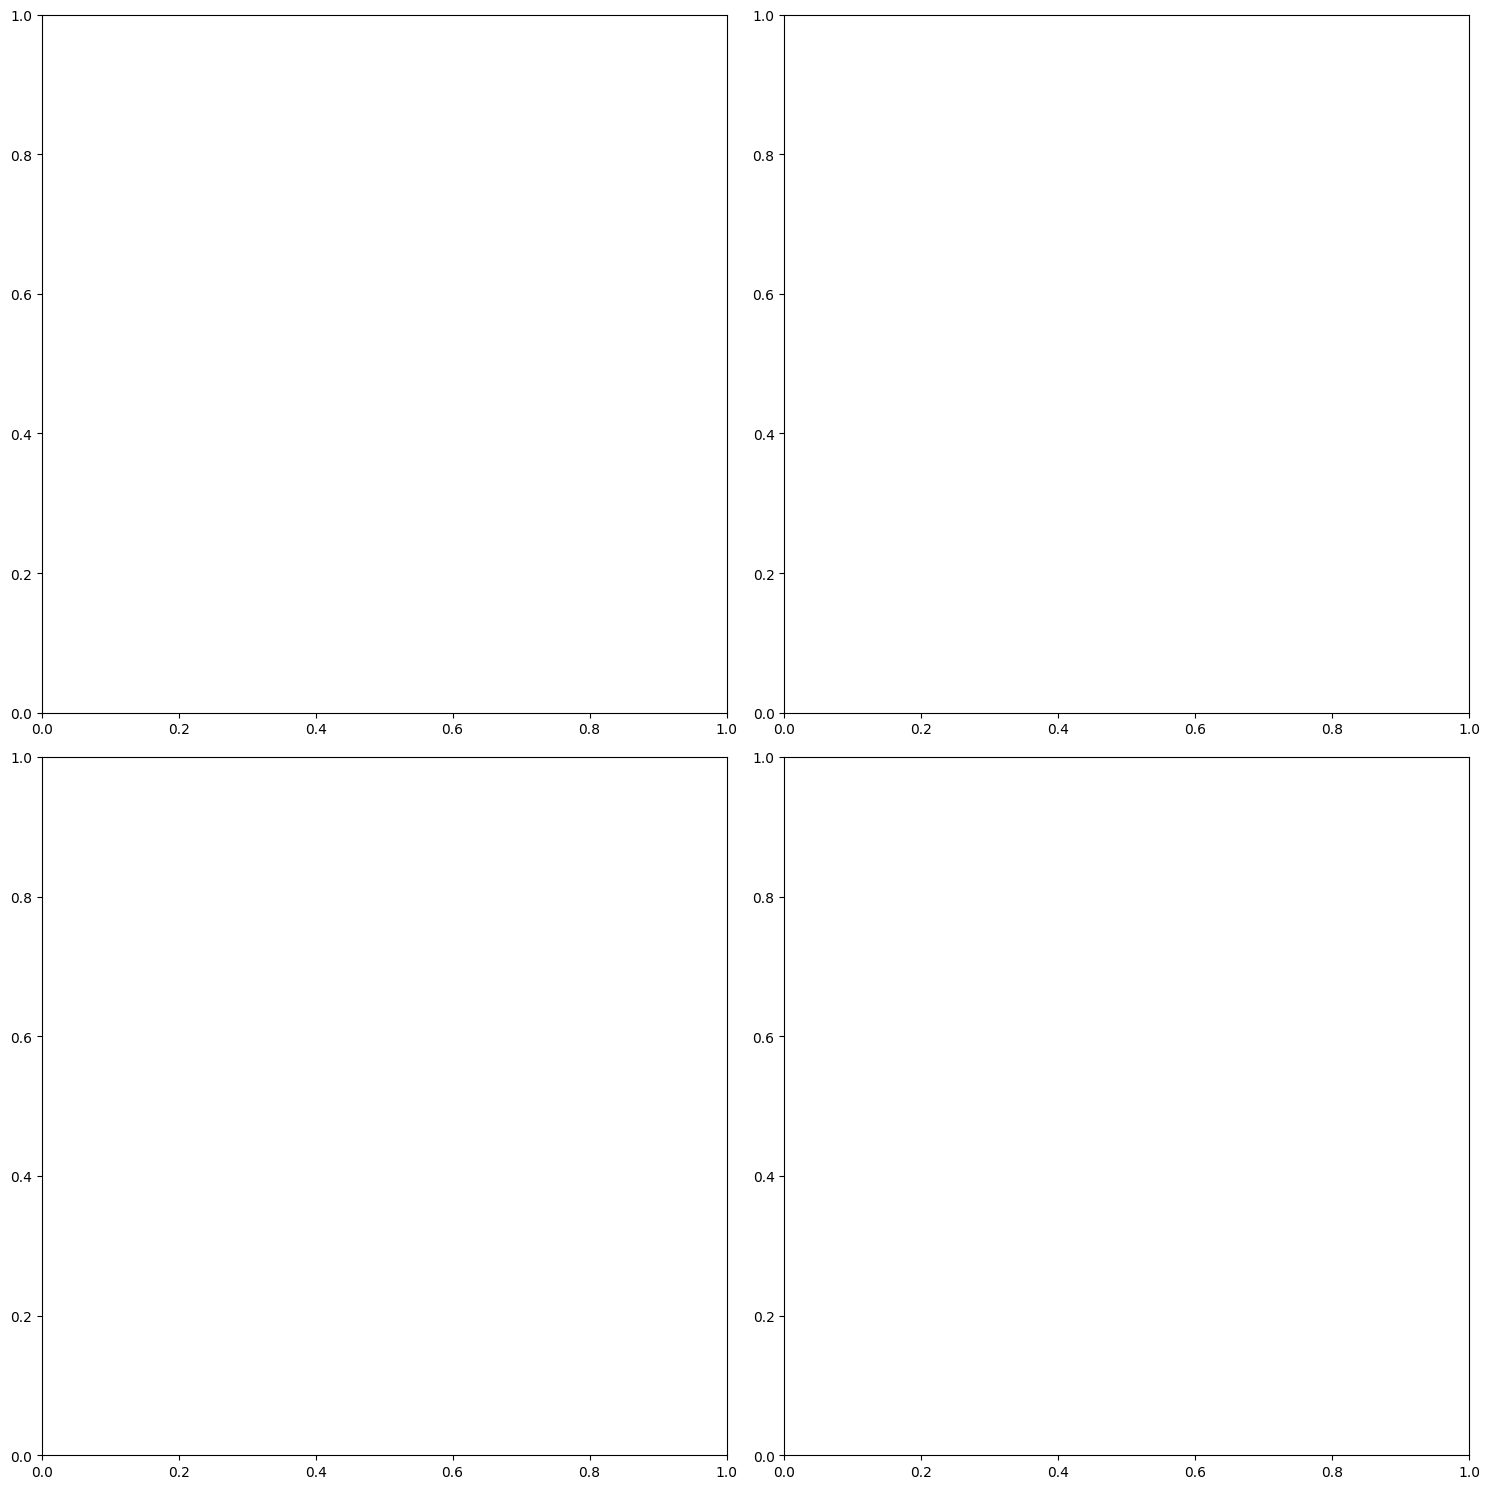

In [8]:
for images, targets in train_loader:
    print(f"Loaded batch with {len(images)} images")
    print(f"First image shape: {images[0].shape}")
    print(f"First target: {targets[0]}")
    
    # Plot all images in the batch
    plt.figure(figsize=(15, 15))
    for i in range(len(images)):
        if i >= 4:  # Limit to 4 images to avoid crowding
            break
            
        # Create a subplot for each image
        plt.subplot(2, 2, i+1)
        
        # Plot the image with bounding box
        fig = plot_image_with_bbox(images[i], targets[i], i, class_names)
        plt.close(fig)  # Close the individual figure
    
    plt.tight_layout()
    plt.show()
    break  # Just test one batch